In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns


from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


### Initial familiarization

In [2]:
# Reading in the file
df = pd.read_csv('automobile.txt', delimiter=',')

In [3]:
# Checking head of the table
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Checking columns
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
# Checking how many rows
df.index

RangeIndex(start=0, stop=205, step=1)

In [6]:
# Checking if any values entered as null
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# Check type of entries
display(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
# Familiarisation with unique values in each column
for column in df.columns:
    print(f'{column} : {df[column].unique()}')

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four' '?']
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [9]:
# FAmiliarization with summarization -> we can see which colums are having different entries 
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Data cleaning

In [10]:
# Drop duplicates
df.drop_duplicates()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Although the function shows that there is no null values we can see that there are entries with '?'

In [11]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

my = {}
for column in columns:
    my[column] = df[df[column] == '?'].count()[0]
    
print(my)

{'symboling': 0, 'normalized-losses': 41, 'make': 0, 'fuel-type': 0, 'aspiration': 0, 'num-of-doors': 2, 'body-style': 0, 'drive-wheels': 0, 'engine-location': 0, 'wheel-base': 0, 'length': 0, 'width': 0, 'height': 0, 'curb-weight': 0, 'engine-type': 0, 'num-of-cylinders': 0, 'engine-size': 0, 'fuel-system': 0, 'bore': 4, 'stroke': 4, 'compression-ratio': 0, 'horsepower': 2, 'peak-rpm': 2, 'city-mpg': 0, 'highway-mpg': 0, 'price': 4}


In [12]:
# Choosing columns of interest
df = df[['symboling', 'make', 'fuel-type',
        'body-style', 'drive-wheels', 'engine-type', 'engine-size',
        'horsepower', 'city-mpg','highway-mpg', 'price']]
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,convertible,rwd,dohc,130,111,21,27,13495
1,3,alfa-romero,gas,convertible,rwd,dohc,130,111,21,27,16500
2,1,alfa-romero,gas,hatchback,rwd,ohcv,152,154,19,26,16500
3,2,audi,gas,sedan,fwd,ohc,109,102,24,30,13950
4,2,audi,gas,sedan,4wd,ohc,136,115,18,22,17450


###  Missing values to deal with:
'horsepower': 2, 'price': 4

In [13]:
# Replace ? with NaN
df = df.replace('?', np.nan)

In [14]:
# Lets how many missing values now 
df.isnull().sum()

symboling       0
make            0
fuel-type       0
body-style      0
drive-wheels    0
engine-type     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
dtype: int64

In [15]:
# Check which positions don't have entries
df[df['horsepower'].isnull()]

,symboling,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
130,0,renault,gas,wagon,fwd,ohc,132,NaN,23,31,9295
131,2,renault,gas,hatchback,fwd,ohc,132,NaN,23,31,9895


In [16]:
# We can remove those entries as both have horsepower and peak-rpm incomplete
df.drop([130, 131], axis=0, inplace=True)

In [17]:
# Check the price 
df[df['price'].isnull()]

,symboling,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
9,0,audi,gas,hatchback,4wd,ohc,131,160,16,22,NaN
44,1,isuzu,gas,sedan,fwd,ohc,90,70,38,43,NaN
45,0,isuzu,gas,sedan,fwd,ohc,90,70,38,43,NaN
129,1,porsche,gas,hatchback,rwd,dohcv,203,288,17,28,NaN


#### Audi 

In [18]:
# Check if we have information for brands with similar specifications
df[(df['make']=='audi')]

,symboling,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
3,2,audi,gas,sedan,fwd,ohc,109,102,24,30,13950
4,2,audi,gas,sedan,4wd,ohc,136,115,18,22,17450
5,2,audi,gas,sedan,fwd,ohc,136,110,19,25,15250
6,1,audi,gas,sedan,fwd,ohc,136,110,19,25,17710
7,1,audi,gas,wagon,fwd,ohc,136,110,19,25,18920
8,1,audi,gas,sedan,fwd,ohc,131,140,17,20,23875
9,0,audi,gas,hatchback,4wd,ohc,131,160,16,22,NaN


In [19]:
# We will replace the missing value with 20000 as this may be close to true looking at the specification
df = df.copy()
df.iloc[9,[-1]]= 20000

#### Isuzu

In [20]:
# Look at isuzu
df[(df['make']=='isuzu')]

,symboling,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
43,0,isuzu,gas,sedan,rwd,ohc,111,78,24,29,6785
44,1,isuzu,gas,sedan,fwd,ohc,90,70,38,43,NaN
45,0,isuzu,gas,sedan,fwd,ohc,90,70,38,43,NaN
46,2,isuzu,gas,hatchback,rwd,ohc,119,90,24,29,11048


In [21]:
# Mean value of available prices
6785+11048/2

12309.0

In [22]:
df.iloc[44,[-1]]= 12309

In [23]:
df.iloc[45,[-1]]= 12309

#### Porsche

In [24]:
# For porsche
df[(df['make']=='porsche')]['price']

125    22018
126    32528
127    34028
128    37028
129      NaN
Name: price, dtype: object

In [25]:
# We will assigne to value 30000
df.iloc[129,[-1]]= 30000

#### Now having cleaned dataset we can analyse it 

In [26]:
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,convertible,rwd,dohc,130,111,21,27,13495
1,3,alfa-romero,gas,convertible,rwd,dohc,130,111,21,27,16500
2,1,alfa-romero,gas,hatchback,rwd,ohcv,152,154,19,26,16500
3,2,audi,gas,sedan,fwd,ohc,109,102,24,30,13950
4,2,audi,gas,sedan,4wd,ohc,136,115,18,22,17450


In [27]:
# Check type of entries
display(df.dtypes)

symboling        int64
make            object
fuel-type       object
body-style      object
drive-wheels    object
engine-type     object
engine-size      int64
horsepower      object
city-mpg         int64
highway-mpg      int64
price           object
dtype: object

In [28]:
df[['price', 'horsepower', 'symboling']] = df[['price', 'horsepower', 'symboling']].astype(int)

In [29]:
# Assign types to required columns
df['price'] = df['price'].astype(int)
df['horsepower']=df['horsepower'].astype(int)

In [30]:
display(df.dtypes)

symboling        int32
make            object
fuel-type       object
body-style      object
drive-wheels    object
engine-type     object
engine-size      int64
horsepower       int32
city-mpg         int64
highway-mpg      int64
price            int32
dtype: object

### Data stories and visualisation

#### What influence have the mark on price

In [31]:
make_price = round(df.groupby(['make'])['price'].mean(),2)
make_price

make
alfa-romero      15498.33
audi             18165.00
bmw              26118.75
chevrolet         6007.00
dodge             7875.44
honda             8184.69
isuzu            10612.75
jaguar           34600.00
mazda            10652.88
mercedes-benz    33647.00
mercury          16503.00
mitsubishi        9239.77
nissan           10415.67
peugot           15489.09
plymouth          7963.43
porsche          31120.40
saab             15223.33
subaru            8541.25
toyota            9885.81
volkswagen       10077.50
volvo            18063.18
Name: price, dtype: float64

Text(0, 0.5, 'mark')

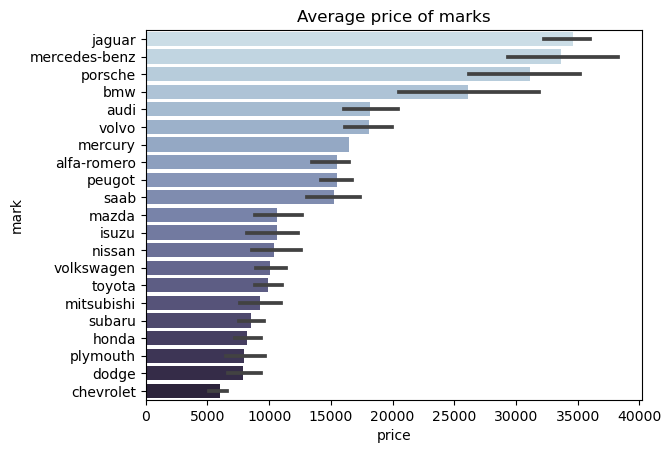

In [32]:
plot_order = make_price.sort_values(ascending=False).index.values
sns.barplot(data=df, y="make", x="price", order=plot_order, palette="ch:s=.25,rot=-.25")
plt.title('Average price of marks')
plt.ylabel('mark')

#### We can see that jaguar and mercedes benz are the most expensive cars. The least expensive are chevrolets. You can buy bmw in the widest range of prices.

### Exploration of horsepower

In [33]:
print(df['horsepower'].unique())
print("Minimal horsepower: ", df['horsepower'].min())
print("Maximal horsepower: ", df['horsepower'].max())

[111 154 102 115 110 140 160 101 121 182  48  70  68  88 145  58  76  60
  86 100  78  90 176 262 135  84  64 120  72 123 155 184 175 116  69  55
  97 152 200  95 142 143 207 288  73  82  94  62  56 112  92 161 156  52
  85 114 162 134 106]
Minimal horsepower:  48
Maximal horsepower:  288


In [34]:
# Make bins for horsepower
bin_labels_5 = [ 'up to 100', '101-150','151-200', '201-250', '251-300']
df['horsepower'] = pd.cut(df['horsepower'],
                        [0, 100, 150, 200, 250, 300],
                        labels = bin_labels_5)

In [35]:
df['horsepower']

0      101-150
1      101-150
2      151-200
3      101-150
4      101-150
        ...   
200    101-150
201    151-200
202    101-150
203    101-150
204    101-150
Name: horsepower, Length: 203, dtype: category
Categories (5, object): ['up to 100' < '101-150' < '151-200' < '201-250' < '251-300']

Text(0.5, 1.0, 'Popularity of horsepower')

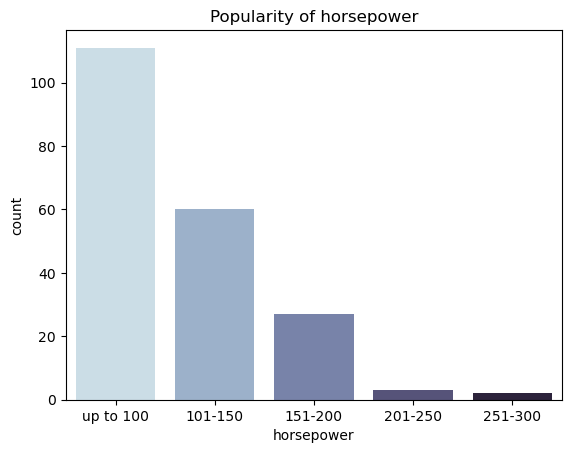

In [36]:
sns.countplot(data=df, x='horsepower', palette="ch:s=.25,rot=-.25")
plt.title('Popularity of horsepower')

#### We can see that the least popular are cars with horse power over 200. The most popular are cars with smaller engines.

In [37]:
# Let's see what parameters those small cars have

df[df['horsepower'] < '201-250'].describe()

,symboling,engine-size,city-mpg,highway-mpg,price
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.803030,124.449495,25.469697,30.919192,12830.691919
std,1.232632,38.603740,6.486737,6.897622,7380.466382
min,-2.000000,61.000000,14.000000,16.000000,5118.000000
25%,0.000000,97.000000,19.250000,25.000000,7775.000000
50%,1.000000,110.000000,25.000000,30.000000,10320.000000
75%,2.000000,141.000000,30.000000,36.000000,16322.000000
max,3.000000,308.000000,49.000000,54.000000,45400.000000


#### The average price for cars with horsepower lower or equal to 200 is almost 13,000 with the highiest of 45,400 and lowest 5,118. This would suggest that there is more cars with lower prices.

### Engine size impact on city mpg and highway mpg


In [38]:
# Explore unique values
print(df['engine-size'].unique())
print(df['engine-size'].min())
print(df['engine-size'].max())

[130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 121 146 171 161 141 173 145]
61
326


In [39]:
# Let's bin those sizes
bin_labels_6 = [ 'up to 100', '101-150','151-200', '201-250', '251-300', '300-350']
df['engine-size'] = pd.cut(df['engine-size'],
                        [0, 100, 150, 200, 250, 300,350],
                        labels = bin_labels_6)

In [40]:
mpg_engine = pd.DataFrame({
                          'City mpg': df.groupby(['engine-size'])['city-mpg'].mean(),
                          'Highway mpg': df.groupby(['engine-size'])['highway-mpg'].mean()
})
mpg_engine.reset_index(inplace=True)
mpg_engine

,engine-size,City mpg,Highway mpg
0,up to 100,30.969697,36.772727
1,101-150,24.096774,29.688172
2,151-200,20.363636,25.424242
3,201-250,16.000000,21.333333
4,251-300,15.000000,19.000000
5,300-350,13.666667,16.333333


Text(0.5, 1.0, 'Impact of engine size on mpg')

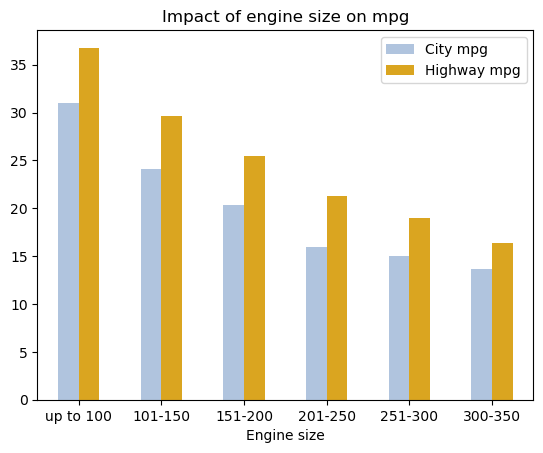

In [41]:
mpg_engine.plot(x="engine-size", y=['City mpg', 'Highway mpg'], kind="bar", rot=0, color=['lightsteelblue', 'goldenrod'])
plt.xlabel('Engine size')
plt.title('Impact of engine size on mpg')

#### Cars with larger engine eat up more fuel both in city and on highway. The most economic cars are with small engines. Eg. cars with engine size up to 100 will drive on average 32 miles per gallon in the city and 38 miles per gallon on the highway. 

### Body style popularity

Text(0.5, 1.0, 'Popularity of car style')

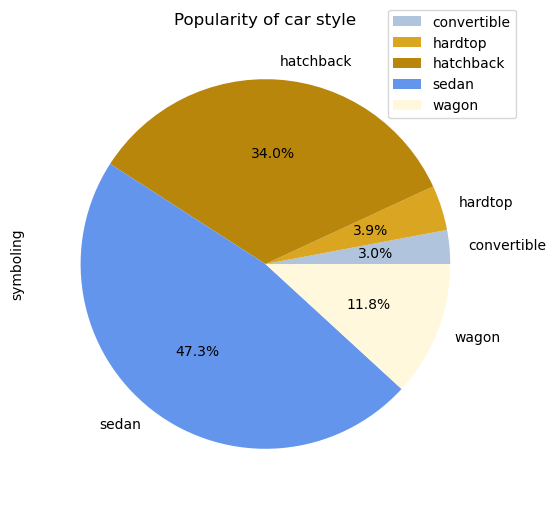

In [42]:
group_by_style = df.groupby(by=['body-style'])

car_style_count = group_by_style.count()

car_style_count = pd.DataFrame(car_style_count.iloc[:,0])

car_style_count.rename(columns={'make': 'Count'}, inplace=True)
colors = ['lightsteelblue', 'goldenrod','darkgoldenrod','cornflowerblue', 'cornsilk']
car_style_count.plot.pie(subplots=True,figsize=(6,6), autopct='%1.1f%%', colors = colors)
plt.legend(bbox_to_anchor =(0.75, 0.80))
plt.title('Popularity of car style')

#### The most popular cars are sedans and hatchbacks making up more than 80% of all positions in data. 

### Fuel type vs average mpg

In [43]:
# Checking fuel types
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [44]:
# New column for average mpg
df['mean-mpg'] = (df['city-mpg'] + df['highway-mpg'])/2

In [45]:
fuel_impact = pd.DataFrame({'Average price': round(df.groupby(['fuel-type'])['price'].mean(), 2),
                           'Min price': df.groupby(['fuel-type'])['price'].min(), 
                            'Max price': df.groupby(['fuel-type'])['price'].max(),
                            'Count': df.groupby(['fuel-type'])['mean-mpg'].count(),
                            'Average mpg': round(df.groupby(['fuel-type'])['mean-mpg'].mean(), 1)
                            })
fuel_impact.reset_index(inplace = True)
fuel_impact.rename(columns = {'fuel-type':'Fuel type'}, inplace = True)
fuel_impact

,Fuel type,Average price,Min price,Max price,Count,Average mpg
0,diesel,15838.15,7099,31600,20,32.5
1,gas,13078.13,5118,45400,183,27.5


#### Diesels are less popular although you can drive for longer on one gallon of fuel. Siesels are usually more expensive than cars that use gas.

### Drive wheels

In [46]:
# Explore values
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Text(0.5, 1.0, 'Popularity of drive style')

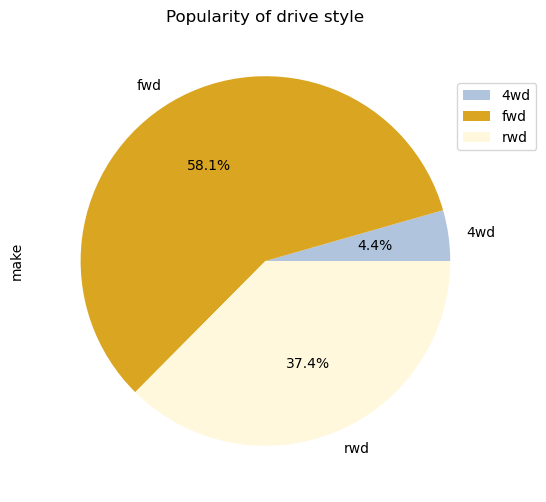

In [47]:
# Let's count values of each
drive_wheels = df.groupby(['drive-wheels']).count()
drive_wheels = drive_wheels['make']
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
drive_wheels.rename(index ={'make':'drive'}, inplace=True)

colors = ['lightsteelblue', 'goldenrod','cornsilk']
drive_wheels.plot.pie(subplots=True,figsize=(6,6), autopct='%1.1f%%', colors = colors)
plt.legend(bbox_to_anchor =(0.9, 0.90))
plt.xlabel('', color='w')
plt.title('Popularity of drive style')

#### Forward drives are the most popular. Let's see if price is affected by this.

Text(0.5, 1.0, 'Effect of drive on car price')

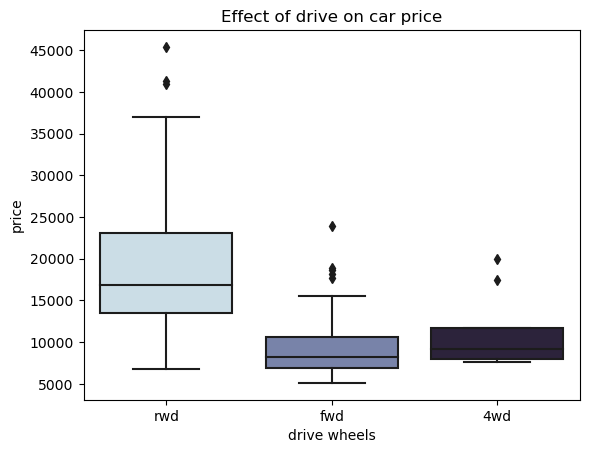

In [48]:
sns.boxplot(data=df, x="drive-wheels", y="price", palette="ch:s=.25,rot=-.25")
plt.xlabel('drive wheels')
plt.title('Effect of drive on car price')

#### As expected the cheapest are the most popular forward drive cars.

### Symboling

In [49]:
# Make bins for symboling
bin_labels_3 = [ 'low risk', 'normal risk', 'high risk']
df['symboling'] = pd.cut(df['symboling'],
                        [-3, -1, 1, 3],
                        labels = bin_labels_3)
df['symboling']

0        high risk
1        high risk
2      normal risk
3        high risk
4        high risk
          ...     
200       low risk
201       low risk
202       low risk
203       low risk
204       low risk
Name: symboling, Length: 203, dtype: category
Categories (3, object): ['low risk' < 'normal risk' < 'high risk']

In [51]:
# Risk factor distribution
df.groupby(['symboling'])['make'].count()

symboling
low risk        25
normal risk    120
high risk       58
Name: make, dtype: int64

In [88]:
# Lets see which brand is the most risky
high_risk = df[df['symboling'] == 'high risk'].groupby(['make'])['make'].count()

In [108]:
high_risk

make
alfa-romero      2
audi             3
bmw              1
chevrolet        1
dodge            1
honda            2
isuzu            1
mazda            4
mercedes-benz    1
mitsubishi       8
nissan           3
plymouth         1
porsche          4
saab             6
subaru           3
toyota           8
volkswagen       9
Name: make, dtype: int64

In [110]:
df.groupby(['make'])['make'].count()

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
Name: make, dtype: int64

In [90]:
# Lets see which one is the safest
low_risk = df[df['symboling'] == 'low risk'].groupby(['make'])['make'].count()

In [91]:
# Normal risk
normal_risk = df[df['symboling'] == 'normal risk'].groupby(['make'])['make'].count()

In [126]:


## we will assemble a DataFrame of only the relevant features to plot  
brand_risk = pd.DataFrame({
                           'high risk' : high_risk,
                           'normal risk' : normal_risk,
                            'low risk' : low_risk,
                          
                                   }
                                   ).fillna(0)
brand_risk



,high risk,normal risk,low risk
make,,,
alfa-romero,2.0,1.0,0.0
audi,3.0,4.0,0.0
bmw,1.0,7.0,0.0
chevrolet,1.0,2.0,0.0
dodge,1.0,7.0,1.0
honda,2.0,11.0,0.0
isuzu,1.0,3.0,0.0
jaguar,0.0,3.0,0.0
mazda,4.0,13.0,0.0


Text(0.5, 1.0, 'Safety of brands')

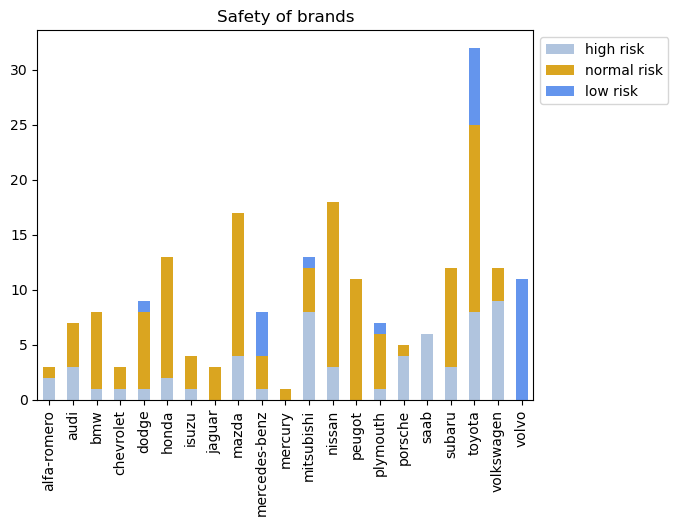

In [127]:
brand_risk.plot(kind='bar', stacked=True, color=['lightsteelblue', 'goldenrod','cornflowerblue'])
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('')
plt.title('Safety of brands')

In [128]:
#Lets check the price of most risky cars
round(df[df['symboling'] == 'high risk']['price'].mean(), 0)

13424.0

In [129]:
#Lets check the price of the safes
round(df[df['symboling'] == 'low risk']['price'].mean(), 0)

17145.0

In [130]:
#Lets check the price of the safes
round(df[df['symboling'] == 'normal risk']['price'].mean(), 0)

12524.0